# **Problem Statment**

Delhivery, a leading logistics company, seeks to enhance its data-driven operations by transforming raw outputs from its data engineering pipelines into actionable insights.

Delhivery aims to improve the accuracy and efficiency of their trip duration forecasting by building a model that predicts actual delivery time using historical logistics data, including route characteristics, OSRM estimates, and segment-level information


# **Importing required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# **Loading the data**

In [ ]:
!gdown --id 1xGKQYkPamnea5QwoxHwY_zZgIbBf9rcI -O delhivery_data.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xGKQYkPamnea5QwoxHwY_zZgIbBf9rcI
To: /content/delhivery_data.csv
100% 46.3M/46.3M [00:00<00:00, 55.2MB/s]


In [ ]:
df = pd.read_csv('delhivery_data.csv')
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 04:01,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),20-09-2018 03:21,...,20-09-2018 03:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000
5,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 06:15,10.403038,15,11,12.1171,1.363636,15,11,12.1171,1.363636
6,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 05:47,18.045481,44,17,21.2890,2.588235,28,6,9.1719,4.666667
7,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 05:25,28.061896,65,29,35.8252,2.241379,21,11,14.5362,1.909091
8,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 05:15,38.939167,76,39,47.1900,1.948718,10,10,11.3648,1.000000
9,training,20-09-2018 02:35,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),20-09-2018 04:47,...,20-09-2018 04:49,43.595802,102,45,53.2334,2.266667,26,6,6.0434,4.333333


# **Basic exploration of data**

**1) Shape**

In [ ]:
df.shape

(144867, 24)

**Observation:**


---


The dataset comprises **144,867** delivery **records** with **24 features** each. This indicates a sufficiently large dataset, enabling robust exploratory analysis, statistical testing, and predictive modeling.

**2) DataType information of all columns of dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  int64  
 12  is_cutoff       

**Observations:**


---


* The dataset contains 144,867 records and 24 features, making it a large-scale dataset suitable for building high-confidence analytics and machine learning models.

* Mostly no missing value, Out of 24 columns, 22 have complete data. By checking the criticality of the column we can impute them or drop them.

* Many columns have Object datatype contain date/time values (trip_creation_time, od_start_time, od_end_time, cutoff_timestamp) which should be converted to datetime64 for proper time-series or feature engineering.

* The richness of operational data supports detailed performance analysis, benchmark comparison, and predictive modeling.

**3) Convert date columns to datetime**

* Converting key timestamp columns (trip_creation_time, od_start_time, od_end_time, cutoff_timestamp) from **object** type to proper **datetime** format.

* This allows for easier and more accurate time-based operations such as duration calculations, time difference analysis, feature extraction (like day, hour, weekday), and temporal filtering.

In [ ]:
import pandas as pd

def convert_columns_to_datetime(df, columns):
  for col in columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
  return df

date_columns = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
df = convert_columns_to_datetime(df, date_columns)

/tmp/ipython-input-4261683772.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-4261683772.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-4261683772.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-4261683772.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df

**After converting (trip_creation_time, od_start_time, od_end_time, cutoff_timestamp) columns from Object to Datetime64 datatype**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

**4) Missing Values**

In [ ]:
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df))*100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
source_name,293,0.202254
destination_name,261,0.180165
route_schedule_uuid,0,0.000000
data,0,0.000000
route_type,0,0.000000
trip_uuid,0,0.000000
source_center,0,0.000000
trip_creation_time,0,0.000000
destination_center,0,0.000000
od_start_time,0,0.000000


**Observations:**


---


* Total Columns: 24

* Columns with Missing Data: Only 2 columns have missing values:

* source_name: 293 missing values (0.20%)

* destination_name: 261 missing values (0.18%)

* Other 22 columns are fully complete (0% missing).

* To maintain data completeness and ensure interpretability, missing values in the source_name and destination_name columns were imputed with the categories 'unknown_source_name' and 'unknown_destination_name'.

* This allows for consistent analysis while preserving visibility into records with unidentified locations.

**Replacing missing values with new category**

In [ ]:
df['source_name']=df['source_name'].fillna('unknown_source_name')

In [ ]:
df['source_name'].isna().sum()

np.int64(0)

In [ ]:
df['destination_name'] = df['destination_name'].fillna('unknown_destination_name')

In [ ]:
df['destination_name'].isna().sum()

np.int64(0)

**Checking for missing values again if any**

* Following the imputation of missing values in source_name and destination_name with the categories 'unknown_source_name' and 'unknown_destination_name', the dataset no longer contains any missing values.

* This ensures full data completeness while retaining interpretability for records with unidentified locations.

In [ ]:
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df))*100
})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
data,0,0.0
trip_creation_time,0,0.0
route_schedule_uuid,0,0.0
route_type,0,0.0
trip_uuid,0,0.0
source_center,0,0.0
source_name,0,0.0
destination_center,0,0.0
destination_name,0,0.0
od_start_time,0,0.0


**5) Stastical Analysis of Numerical and categorical columns**

In [ ]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:33:53.690074112,2018-09-22 18:02:16.102631680,2018-09-23 10:04:01.836857344,961.262986,232.926567,2018-09-23 02:32:01.271510784,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
min,2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-12 00:50:00,20.000000,9.000000,2018-09-12 00:02:00,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:00,2018-09-17 08:05:00,2018-09-18 01:48:00,161.000000,22.000000,2018-09-17 18:59:00,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:00,2018-09-22 08:53:00,2018-09-23 03:13:00,449.000000,66.000000,2018-09-22 20:31:00,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:00,2018-09-27 22:41:00,2018-09-28 12:49:00,1634.000000,286.000000,2018-09-28 05:14:00,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:00,2018-10-06 04:27:00,2018-10-08 03:00:00,7898.000000,1927.000000,2018-10-06 23:44:00,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,344.755577,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530


**Observations:**



---


**1. Trip Duration & Time Range (Datetime Columns)**

**Time Range:**

* The trips span from 2018-09-12 to 2018-10-08, indicating a ~4-week time window.
This is sufficient for short-term trend analysis but may be limited for long-term seasonality insights.

**Time Columns** (trip_creation_time, od_start_time, od_end_time, cutoff_timestamp)**:**

* All records have timestamps (no missing values).
The gap between creation, start, and end times likely represents different stages in trip lifecycle.

**2. Time Duration Metrics**

**start_scan_to_end_scan:**

* Represents scan-to-scan duration (likely in seconds or minutes).
Ranges from 20 to 7,898 (median = 449), showing high variability, likely due to operational differences.

**actual_time vs osrm_time:**

* Median actual_time: 132 vs osrm_time: 64

* Indicates that real delivery times are often longer than expected from OSRM predictions.
May imply delays or inefficiencies in routing/operations.

**segment_actual_time vs segment_osrm_time:**

* Median values: 29 vs 17, again showing real times are consistently longer.

* Extreme cases like negative values in segment_actual_time (-244) are data quality issues and should be handled.

** 3. Distance Metrics**

**actual_distance_to_destination:**

* Median: 66.1, max: 1927.4, showing wide delivery range.

* Long-distance trips may require separate modeling or segmentation.

**osrm_distance vs actual_distance:**

* Similar trend to time: actual distances are higher than OSRM-estimated in many cases.
Useful for identifying underestimation or route inefficiencies.

**Extremely high values in:**

actual_time (up to 4,532),

segment_actual_time (3,051),

cutoff_factor (up to 1927),

factor (77.38), and segment_factor (574.25)

These may be genuine outliers or data errors and should be examined further. Consider visualizing distributions and using percentile-based capping or outlier treatment.

In [ ]:
df.describe(include="O")

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867,144867,144867
unique,2,1504,2,14817,1508,1499,1481,1469
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


**Observations:**



---


**data column:**

  * Contains only 2 unique values.

  * May indicate some imbalance (e.g., training vs test) but is acceptable for modeling and analysis.

**ID columns (trip_uuid, route_schedule_uuid, etc.):**

  * Show high cardinality, which is expected.

  * These are likely unique identifiers for trips, parcels, or routes.

  * Their uniqueness ensures data traceability and integrity.

**Repeated source_name and destination_name pairs:**

  * Indicate that specific high-frequency routes are reused often.

  * Fewer unique trips (trip_uuid) likely because multiple segments or scan records exist per trip.

  * Common in logistics networks where operational efficiency favors standardized routes.



**6) Unique value counts**

We analyzed unique value counts for each column to identify those with low cardinality.

In [ ]:
for i in df.columns:
  print(i, ':', df[i].nunique())

data : 2
trip_creation_time : 11341
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1499
destination_center : 1481
destination_name : 1469
od_start_time : 16500
od_end_time : 16588
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 30049
actual_distance_to_destination : 144510
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


**Observations:**

---



* Columns such as route_type, data, and is_cutoff have only 2 unique values and are ideal candidates to be converted into categorical types. This will help in optimizing memory and improve model interpretability.

**data column:**

* Contains only two values: "training" and "test", suitable for conversion to categorical however not critical for analysis once train/test sets are separated.

**is_cutoff column:**

* Contains only two values: True and False, can be converted to categorical or boolean, however not very informative unless it shows strong correlation with performance or target.

**route_type column:**

* Contains only two unique values, should be converted to categorical.

* distinction can be important in analysis, as it may explain differences in delivery time, distance, or trip patterns based on the operational type.


**7) Convert object type to categorical**

In [ ]:
df['route_type'] = df['route_type'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

**8) Aggregating Rows by "*trip_uuid*"**

In [ ]:
trip_df = df.groupby('trip_uuid').agg({
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'osrm_time': 'sum',
    'actual_time': 'sum',
    'start_scan_to_end_scan': 'first',
    'source_name': 'first',
    'destination_name': 'first',
    'trip_creation_time': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last'
}).reset_index()


In [ ]:
trip_df

,trip_uuid,segment_actual_time,segment_osrm_time,segment_osrm_distance,osrm_time,actual_time,start_scan_to_end_scan,source_name,destination_name,trip_creation_time,od_start_time,od_end_time
0,trip-153671041653548748,1548,1008,1320.4733,7787,15682,999,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-13 13:40:00
1,trip-153671042288605164,141,65,84.1894,210,399,122,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-12 03:02:00
2,trip-153671043369099517,3308,1941,2545.2678,65768,112225,3099,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-14 17:34:00
3,trip-153671046011330457,59,16,19.8766,24,82,100,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 00:01:00,2018-09-12 01:41:00
4,trip-153671052974046625,340,115,146.7919,207,556,152,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:00,2018-09-12 00:02:00,2018-09-12 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,82,62,64.8551,148,186,152,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),2018-10-03 23:55:00,2018-10-03 23:55:00,2018-10-04 06:41:00
14813,trip-153861104386292051,21,11,16.0883,19,33,60,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:00,2018-10-03 23:57:00,2018-10-04 00:57:00
14814,trip-153861106442901555,281,88,104.8866,134,549,173,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:00,2018-10-03 23:57:00,2018-10-04 06:59:00
14815,trip-153861115439069069,258,221,223.5324,446,600,105,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:00,2018-10-03 23:59:00,2018-10-04 05:47:00


**9) Feature Engineering**

In [ ]:
#trip_df.drop(['dest_city', 'dest_code', 'dest_state','src_city', 'src_code', 'src_state'], axis=1, inplace=True)
trip_df[['dest_city', 'dest_code', 'dest_state']] = trip_df['destination_name'].str.extract(r'^([^_()]+)(?:_([\w_]+))?\s*\((.*?)\)')

trip_df[['src_city', 'src_code', 'src_state']] = trip_df['source_name'].str.extract(r'^([^_()]+)(?:_([\w_]+))?\s*\((.*?)\)')


In [ ]:
#trip_df.drop(['delay'], axis=1, inplace=True)

trip_df['trip_duration(in mins)'] = (pd.to_datetime(trip_df['od_end_time']) - pd.to_datetime(trip_df['od_start_time'])).dt.total_seconds() / 60
trip_df['delay (in mins)'] = trip_df['actual_time'] - trip_df['osrm_time']


In [ ]:
#trip_df.drop(['trip_month'], axis=1, inplace=True)
trip_df['trip_month'] = trip_df['trip_creation_time'].dt.strftime('%B')
trip_df['trip_year'] = trip_df['trip_creation_time'].dt.year
trip_df['trip_day_of_week'] = trip_df['trip_creation_time'].dt.strftime('%A')

In [ ]:
trip_df

,trip_uuid,segment_actual_time,segment_osrm_time,segment_osrm_distance,osrm_time,actual_time,start_scan_to_end_scan,source_name,destination_name,trip_creation_time,...,dest_code,dest_state,src_city,src_code,src_state,trip_duration(in mins),delay (in mins),trip_month,trip_year,trip_day_of_week
0,trip-153671041653548748,1548,1008,1320.4733,7787,15682,999,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:00,...,Central_H_6,Uttar Pradesh,Bhopal,Trnsport_H,Madhya Pradesh,2260.0,7895,September,2018,Wednesday
1,trip-153671042288605164,141,65,84.1894,210,399,122,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:00,...,ChikaDPP_D,Karnataka,Tumkur,Veersagr_I,Karnataka,182.0,189,September,2018,Wednesday
2,trip-153671043369099517,3308,1941,2545.2678,65768,112225,3099,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:00,...,Bilaspur_HB,Haryana,Bangalore,Nelmngla_H,Karnataka,3934.0,46457,September,2018,Wednesday
3,trip-153671046011330457,59,16,19.8766,24,82,100,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,...,MiraRd_IP,Maharashtra,Mumbai Hub,NaN,Maharashtra,100.0,58,September,2018,Wednesday
4,trip-153671052974046625,340,115,146.7919,207,556,152,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:00,...,NaN,Karnataka,Bellary,Dc,Karnataka,718.0,349,September,2018,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,82,62,64.8551,148,186,152,Chandigarh_Mehmdpur_H (Punjab),Zirakpur_DC (Punjab),2018-10-03 23:55:00,...,DC,Punjab,Chandigarh,Mehmdpur_H,Punjab,406.0,38,October,2018,Wednesday
14813,trip-153861104386292051,21,11,16.0883,19,33,60,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:00,...,Blbgarh_DC,Haryana,FBD,Balabhgarh_DPC,Haryana,60.0,14,October,2018,Wednesday
14814,trip-153861106442901555,281,88,104.8866,134,549,173,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),2018-10-03 23:57:00,...,GovndNgr_DC,Uttar Pradesh,Kanpur,Central_H_6,Uttar Pradesh,422.0,415,October,2018,Wednesday
14815,trip-153861115439069069,258,221,223.5324,446,600,105,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:00,...,Busstand_D,Tamil Nadu,Tirunelveli,VdkkuSrt_I,Tamil Nadu,348.0,154,October,2018,Wednesday


**Identification of Unique values in each column**

In [ ]:
for i in trip_df.columns:
  print(i, ':', trip_df[i].nunique())

trip_uuid : 14817
segment_actual_time : 1890
segment_osrm_time : 1242
segment_osrm_distance : 14753
osrm_time : 2771
actual_time : 3876
start_scan_to_end_scan : 1647
source_name : 865
destination_name : 1103
trip_creation_time : 11341
od_start_time : 11391
od_end_time : 11594
dest_city : 924
dest_code : 868
dest_state : 32
src_city : 679
src_code : 676
src_state : 29
trip_duration(in mins) : 2241
delay (in mins) : 3075
trip_month : 2
trip_year : 1
trip_day_of_week : 7


**Making derived column categorical**

In [ ]:
trip_df['src_state'] = trip_df['src_state'].astype('category')
trip_df['dest_state'] = trip_df['dest_state'].astype('category')
trip_df['trip_month'] = trip_df['trip_month'].astype('category')
trip_df['trip_day_of_week'] = trip_df['trip_day_of_week'].astype('category')

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trip_uuid               14817 non-null  object        
 1   segment_actual_time     14817 non-null  int64         
 2   segment_osrm_time       14817 non-null  int64         
 3   segment_osrm_distance   14817 non-null  float64       
 4   osrm_time               14817 non-null  int64         
 5   actual_time             14817 non-null  int64         
 6   start_scan_to_end_scan  14817 non-null  int64         
 7   source_name             14817 non-null  object        
 8   destination_name        14817 non-null  object        
 9   trip_creation_time      14817 non-null  datetime64[ns]
 10  od_start_time           14817 non-null  datetime64[ns]
 11  od_end_time             14817 non-null  datetime64[ns]
 12  dest_city               14645 non-null  object

In [ ]:
merged_df = pd.merge(trip_df, df[['trip_uuid','route_type', 'actual_distance_to_destination']],
                     on='trip_uuid', how='left')

In [ ]:
merged_df

,trip_uuid,segment_actual_time,segment_osrm_time,segment_osrm_distance,osrm_time,actual_time,start_scan_to_end_scan,source_name,destination_name,trip_creation_time,...,src_city,src_code,src_state,trip_duration(in mins),delay (in mins),trip_month,trip_year,trip_day_of_week,route_type,actual_distance_to_destination
0,trip-153671041653548748,1548,1008,1320.4733,7787,15682,999,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:00,...,Bhopal,Trnsport_H,Madhya Pradesh,2260.0,7895,September,2018,Wednesday,FTL,22.812439
1,trip-153671041653548748,1548,1008,1320.4733,7787,15682,999,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:00,...,Bhopal,Trnsport_H,Madhya Pradesh,2260.0,7895,September,2018,Wednesday,FTL,45.902553
2,trip-153671041653548748,1548,1008,1320.4733,7787,15682,999,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:00,...,Bhopal,Trnsport_H,Madhya Pradesh,2260.0,7895,September,2018,Wednesday,FTL,68.090371
3,trip-153671041653548748,1548,1008,1320.4733,7787,15682,999,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:00,...,Bhopal,Trnsport_H,Madhya Pradesh,2260.0,7895,September,2018,Wednesday,FTL,88.382207
4,trip-153671041653548748,1548,1008,1320.4733,7787,15682,999,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:00,...,Bhopal,Trnsport_H,Madhya Pradesh,2260.0,7895,September,2018,Wednesday,FTL,110.168313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,trip-153861115439069069,258,221,223.5324,446,600,105,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Eral_Busstand_D (Tamil Nadu),2018-10-03 23:59:00,...,Tirunelveli,VdkkuSrt_I,Tamil Nadu,348.0,154,October,2018,Wednesday,Carting,33.673835
144863,trip-153861118270144424,274,67,80.5787,106,350,66,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-03 23:59:00,...,Hospet,NaN,Karnataka,355.0,244,October,2018,Wednesday,FTL,22.156817
144864,trip-153861118270144424,274,67,80.5787,106,350,66,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-03 23:59:00,...,Hospet,NaN,Karnataka,355.0,244,October,2018,Wednesday,FTL,25.534793
144865,trip-153861118270144424,274,67,80.5787,106,350,66,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-03 23:59:00,...,Hospet,NaN,Karnataka,355.0,244,October,2018,Wednesday,FTL,22.000767


In [ ]:
merged_df.columns

Index(['trip_uuid', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'osrm_time', 'actual_time',
       'start_scan_to_end_scan', 'source_name', 'destination_name',
       'trip_creation_time', 'od_start_time', 'od_end_time', 'dest_city',
       'dest_code', 'dest_state', 'src_city', 'src_code', 'src_state',
       'trip_duration(in mins)', 'delay (in mins)', 'trip_month', 'trip_year',
       'trip_day_of_week', 'route_type', 'actual_distance_to_destination'],
      dtype='object')

# **10) Univariate Analysis**

**Categorical Columns**

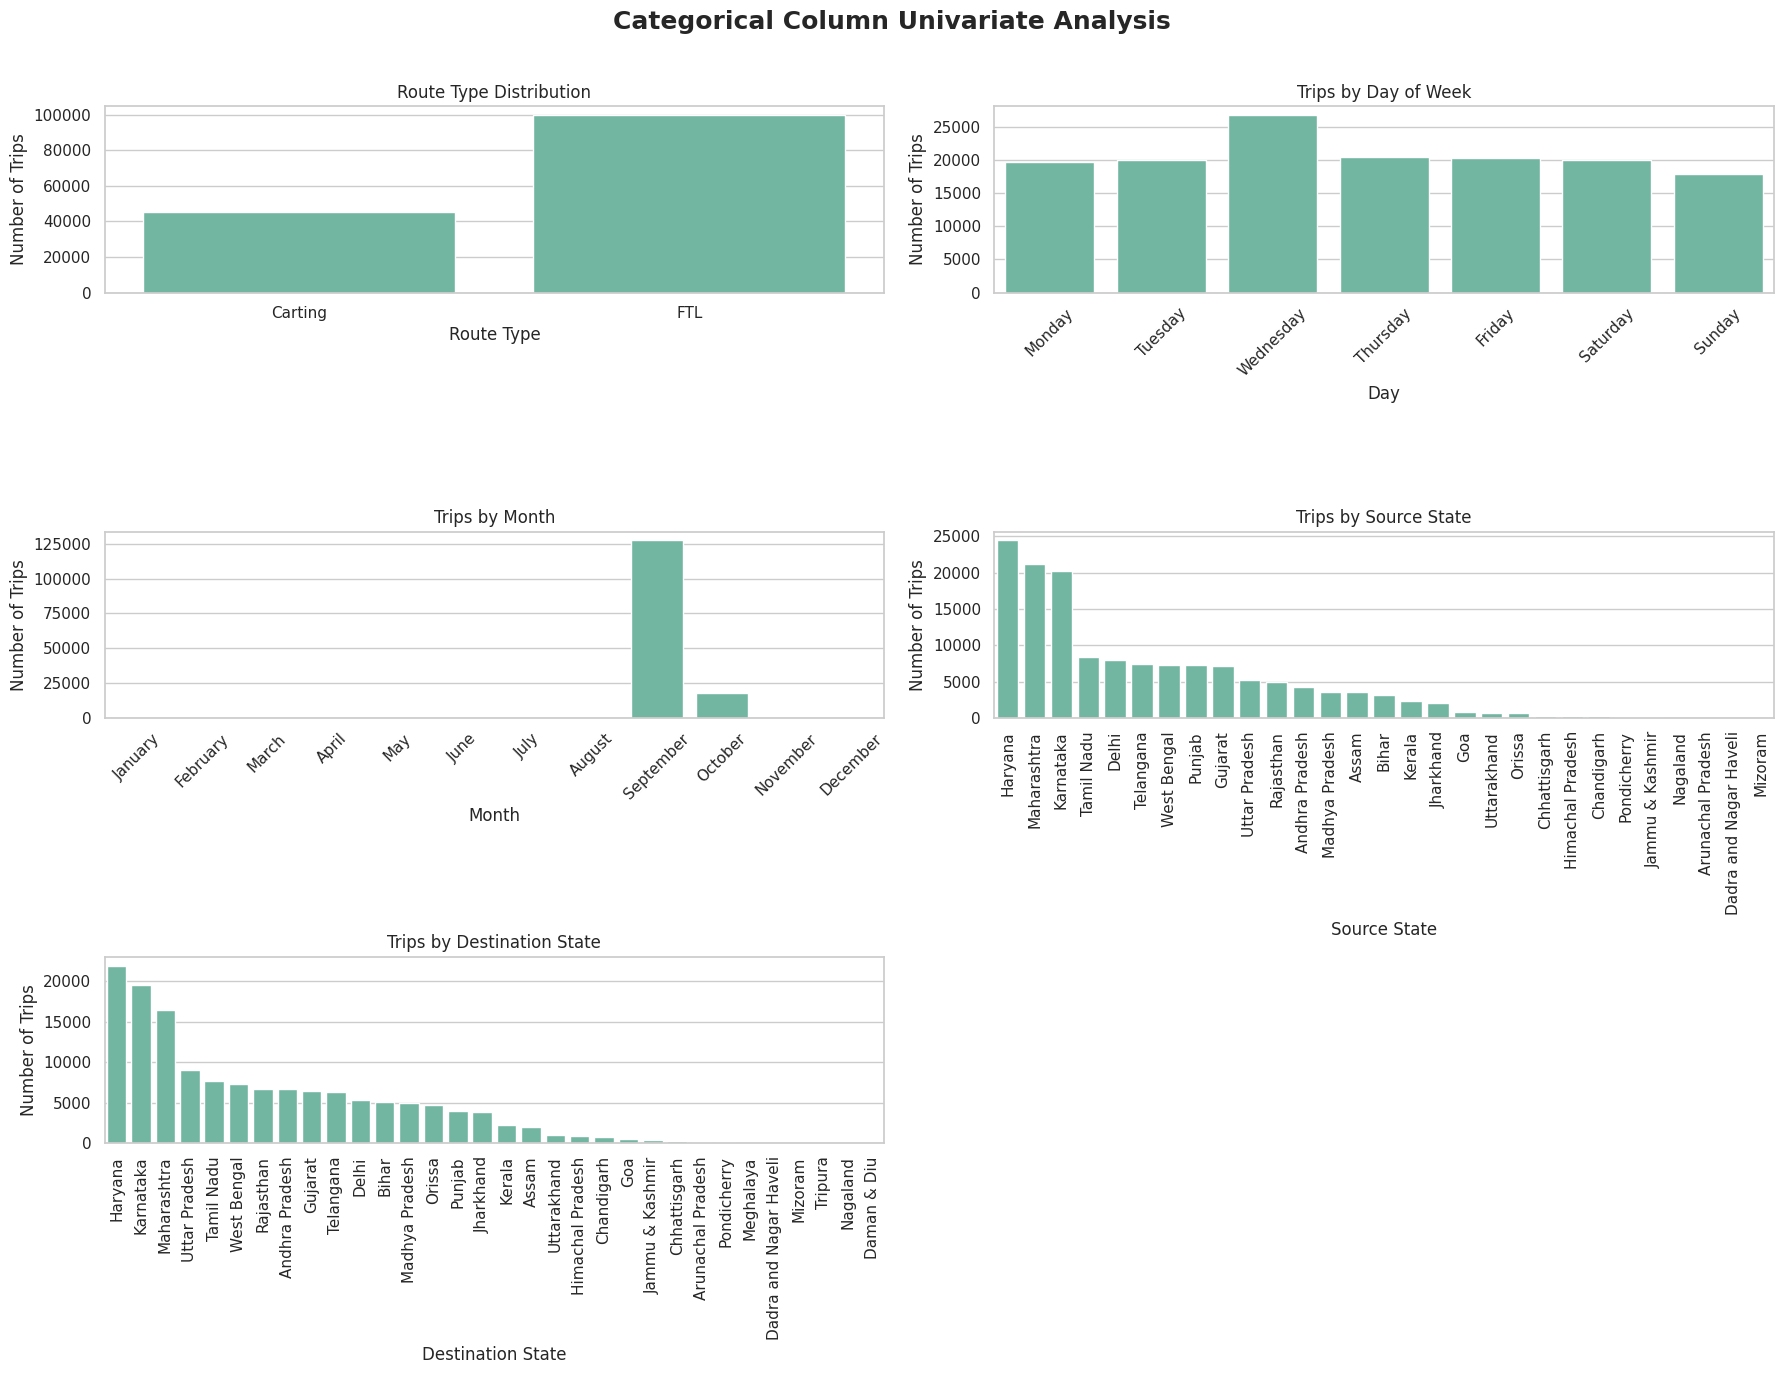

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Improve style
sns.set_theme(style="whitegrid", palette="Set2")

# Create figure with 3 rows x 2 columns = 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Categorical Column Univariate Analysis', fontsize=18, fontweight='bold')

# Flatten axes for easy indexing
axes = axes.flatten()

# 1. route_type
sns.countplot(data=merged_df, x='route_type', ax=axes[0])
axes[0].set_title('Route Type Distribution')
axes[0].set_xlabel('Route Type')
axes[0].set_ylabel('Number of Trips')

# 2. trip_day_of_week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=merged_df, x='trip_day_of_week', order=day_order, ax=axes[1])
axes[1].set_title('Trips by Day of Week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Number of Trips')
axes[1].tick_params(axis='x', rotation=45)

# 3. trip_month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=merged_df, x='trip_month', order=month_order, ax=axes[2])
axes[2].set_title('Trips by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Trips')
axes[2].tick_params(axis='x', rotation=45)

# 4. Source State
src_state_order = merged_df['src_state'].value_counts().index
sns.countplot(data=merged_df, x='src_state', order=src_state_order, ax=axes[3])
axes[3].set_title('Trips by Source State')
axes[3].set_xlabel('Source State')
axes[3].set_ylabel('Number of Trips')
axes[3].tick_params(axis='x', rotation=90)

# 5. Destination State
dest_state_order = merged_df['dest_state'].value_counts().index
sns.countplot(data=merged_df, x='dest_state', order=dest_state_order, ax=axes[4])
axes[4].set_title('Trips by Destination State')
axes[4].set_xlabel('Destination State')
axes[4].set_ylabel('Number of Trips')
axes[4].tick_params(axis='x', rotation=90)

# Hide 6th (empty) subplot if not used
fig.delaxes(axes[5])

# Tight layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


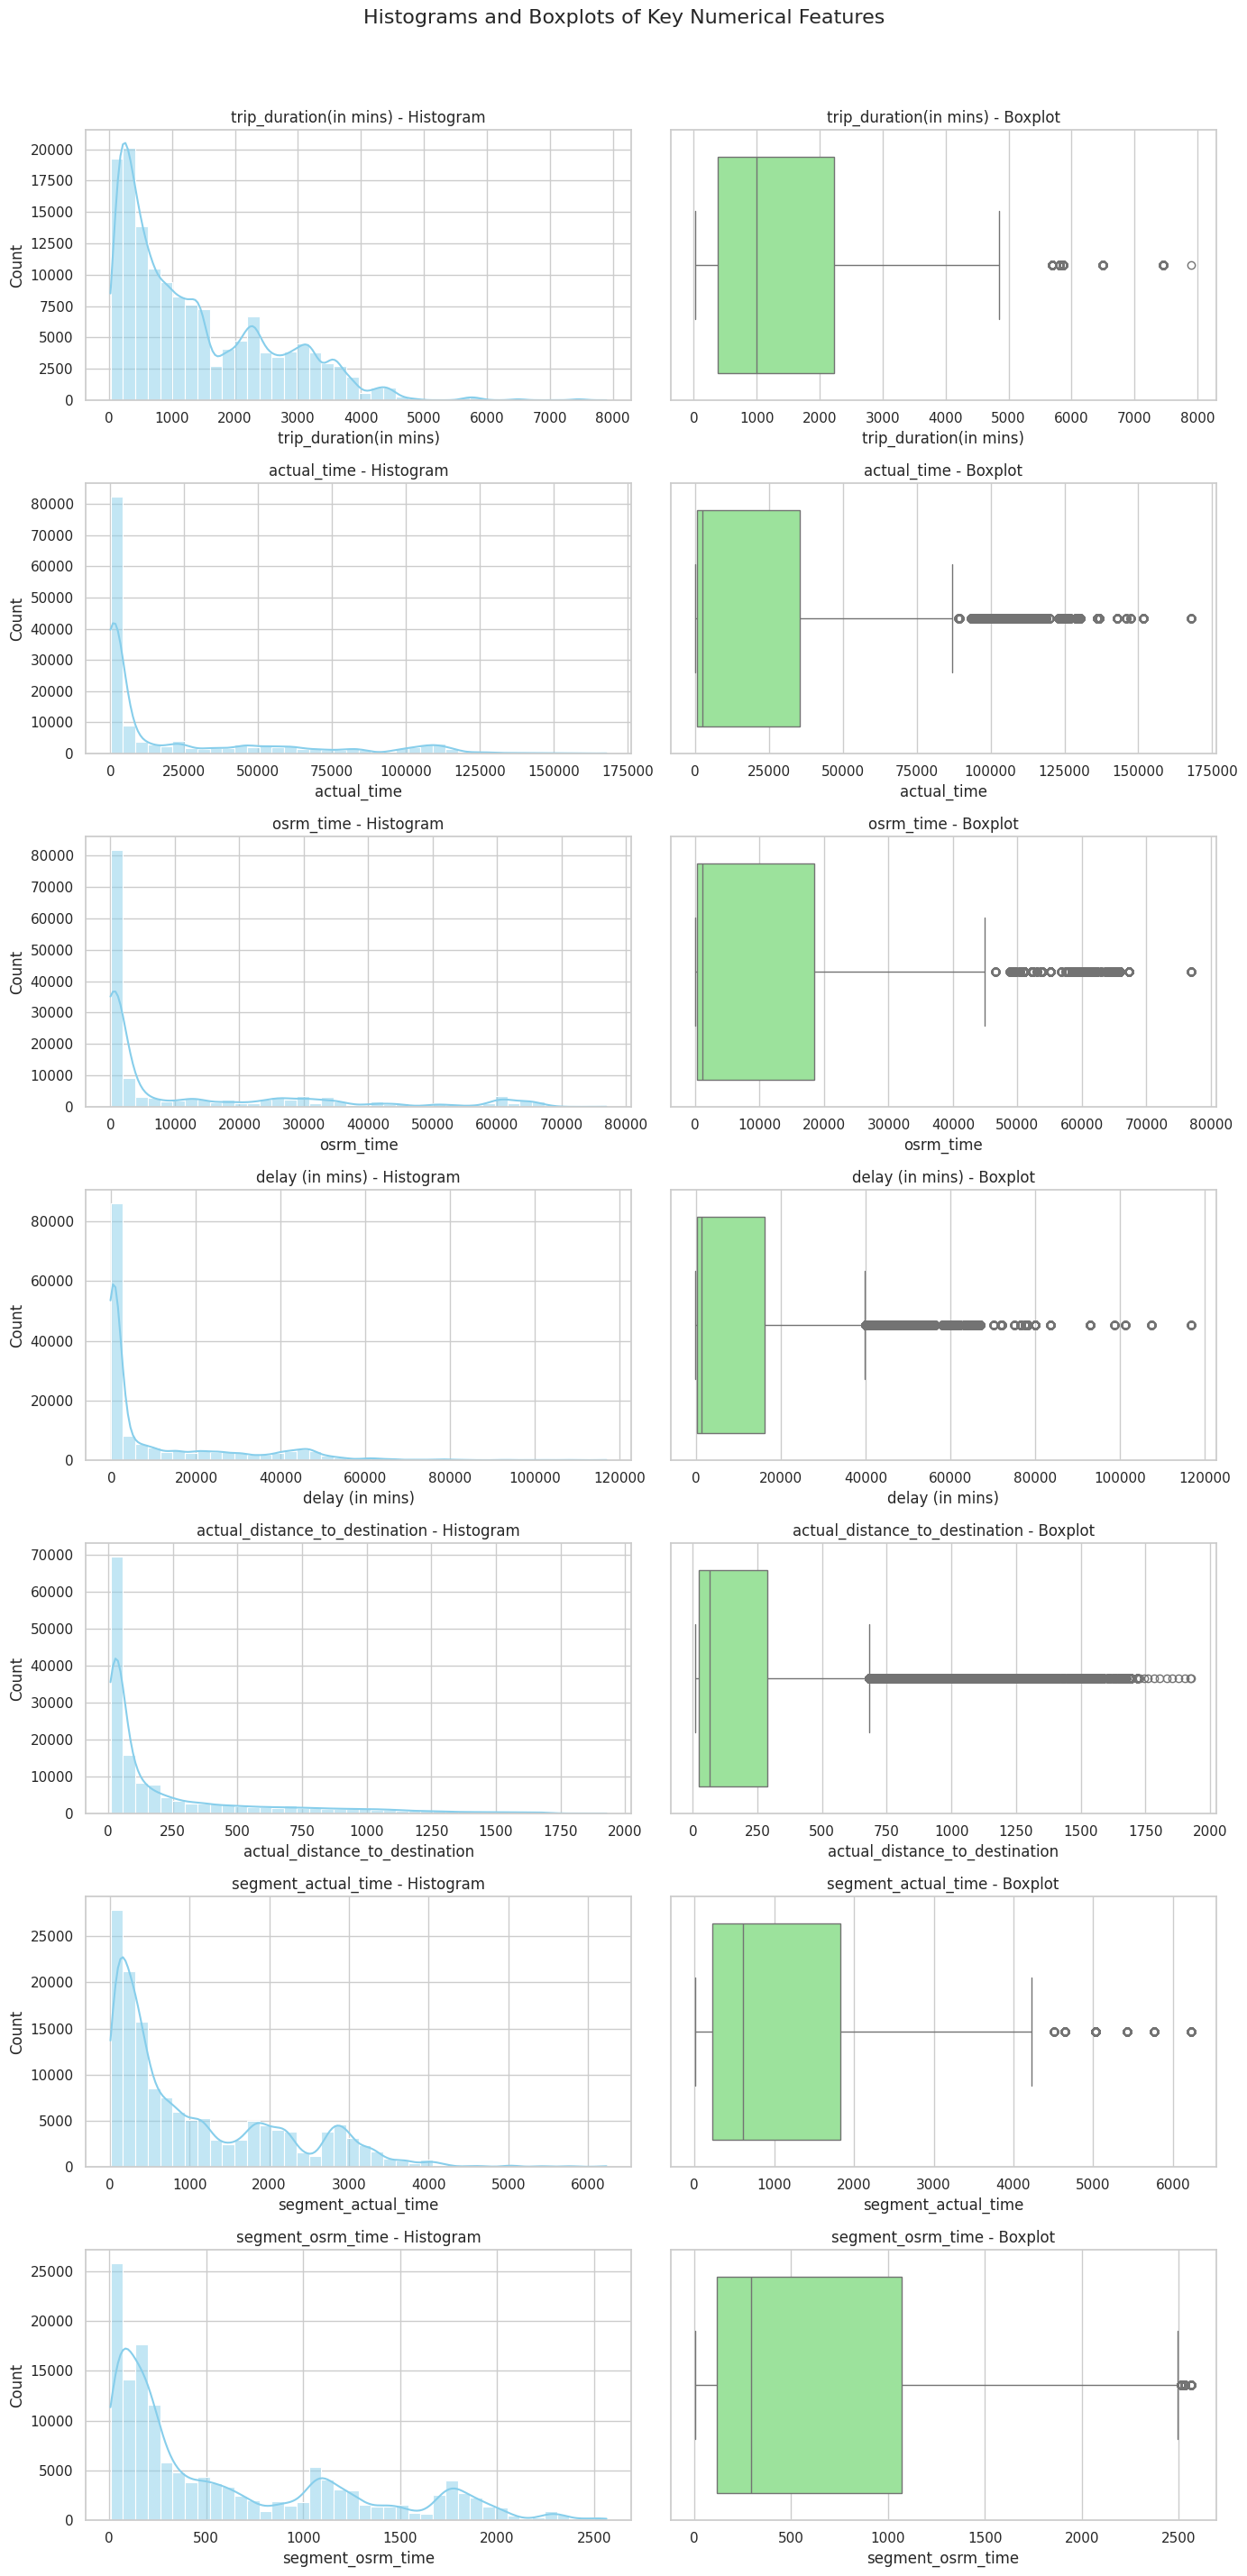

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set aesthetic theme
sns.set_theme(style="whitegrid", palette="Set2")

# If not already derived
#merged_df['delay_vs_osrm'] = trip_df['actual_time'] - trip_df['osrm_time']

# Columns to plot
num_cols = [
    'trip_duration(in mins)', 'actual_time', 'osrm_time', 'delay (in mins)',
    'actual_distance_to_destination', 'segment_actual_time', 'segment_osrm_time'
]

# Plotting
n_rows = len(num_cols)
fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 4))
fig.suptitle('Histograms and Boxplots of Key Numerical Features', fontsize=16, y=1.02)

for i, col in enumerate(num_cols):
    # Histogram
    sns.histplot(data=merged_df, x=col, bins=40, kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'{col} - Histogram')

    # Boxplot
    sns.boxplot(data=merged_df, x=col, ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()


**11) Bivariate Analysis**

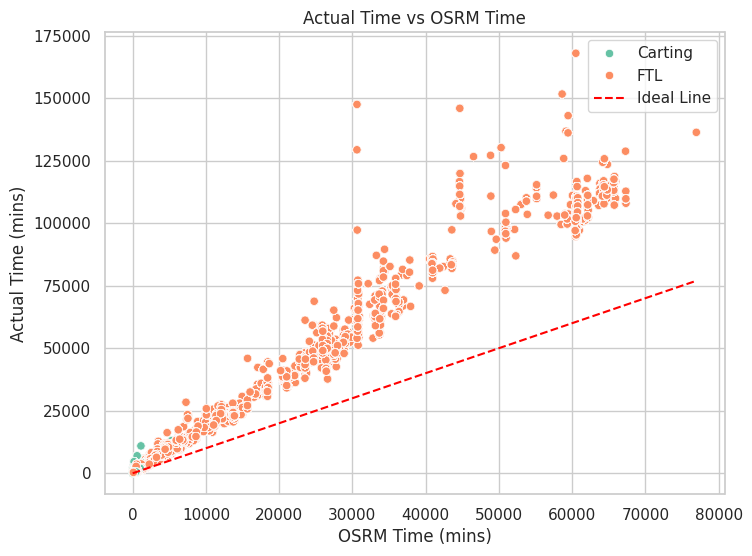

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='osrm_time', y='actual_time', hue='route_type', data=merged_df)
plt.plot([merged_df['osrm_time'].min(), merged_df['osrm_time'].max()],
         [merged_df['osrm_time'].min(), merged_df['osrm_time'].max()],
         color='red', linestyle='--', label='Ideal Line')
plt.title('Actual Time vs OSRM Time')
plt.xlabel('OSRM Time (mins)')
plt.ylabel('Actual Time (mins)')
plt.legend()
plt.show()


**Interpretation:**

Points above the ideal line → Actual time exceeded OSRM-predicted time → Delay

Points on the ideal line → Perfect prediction

Points below the ideal line → Actual time less than predicted → Faster delivery

**Observations:**

* Most FTL trips (orange) are well above the ideal line, indicating actual delivery time is significantly more than OSRM-predicted time

* Very few Carting trips (green), and they seem closer to the ideal line

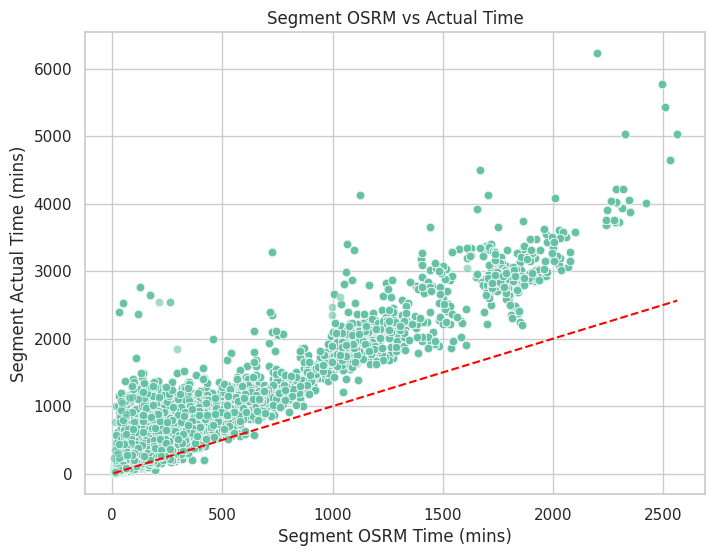

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='segment_osrm_time', y='segment_actual_time', data=merged_df, alpha=0.6)
plt.plot([merged_df['segment_osrm_time'].min(), merged_df['segment_osrm_time'].max()],
         [merged_df['segment_osrm_time'].min(), merged_df['segment_osrm_time'].max()],
         color='red', linestyle='--', label='Ideal Line')
plt.title('Segment OSRM vs Actual Time')
plt.xlabel('Segment OSRM Time (mins)')
plt.ylabel('Segment Actual Time (mins)')
plt.show()

**Observations:**

* Most points lie above the red line, especially for higher segment OSRM times.

* This shows that deliveries usually take more time than what OSRM predicted, which could be because of real-world delays like traffic, handovers, or breaks.

/tmp/ipython-input-18003458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_counts = merged_df.groupby(['src_state', 'dest_state']).size().reset_index(name='trip_count')


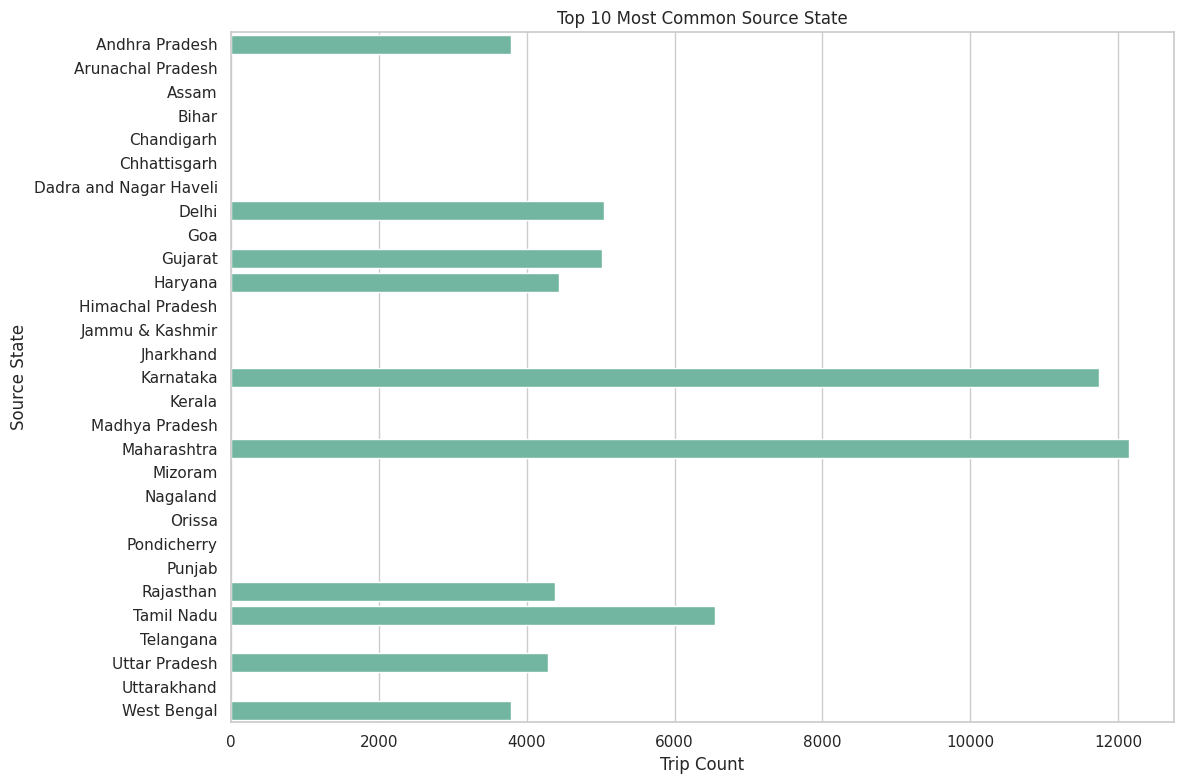

In [ ]:
route_counts = merged_df.groupby(['src_state', 'dest_state']).size().reset_index(name='trip_count')
top_routes = route_counts.sort_values('trip_count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_routes, x='trip_count', y='src_state')
plt.title('Top 10 Most Common Source State')
plt.xlabel('Trip Count')
plt.ylabel('Source State')
#plt.legend(title='Destination State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations:**

* Maharashtra and Karnataka have the highest trip counts, indicating these are key logistics hubs.

* Tamil Nadu, Delhi, and Gujarat also have significant volumes, suggesting they are major contributors to route volume.
* States like Arunachal Pradesh, Uttar Pradesh, West Bengal and Rajasthan show moderate volume, indicating they are part of inter-state logistics

/tmp/ipython-input-514431104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_counts = merged_df.groupby(['src_state', 'dest_state']).size().reset_index(name='trip_count')


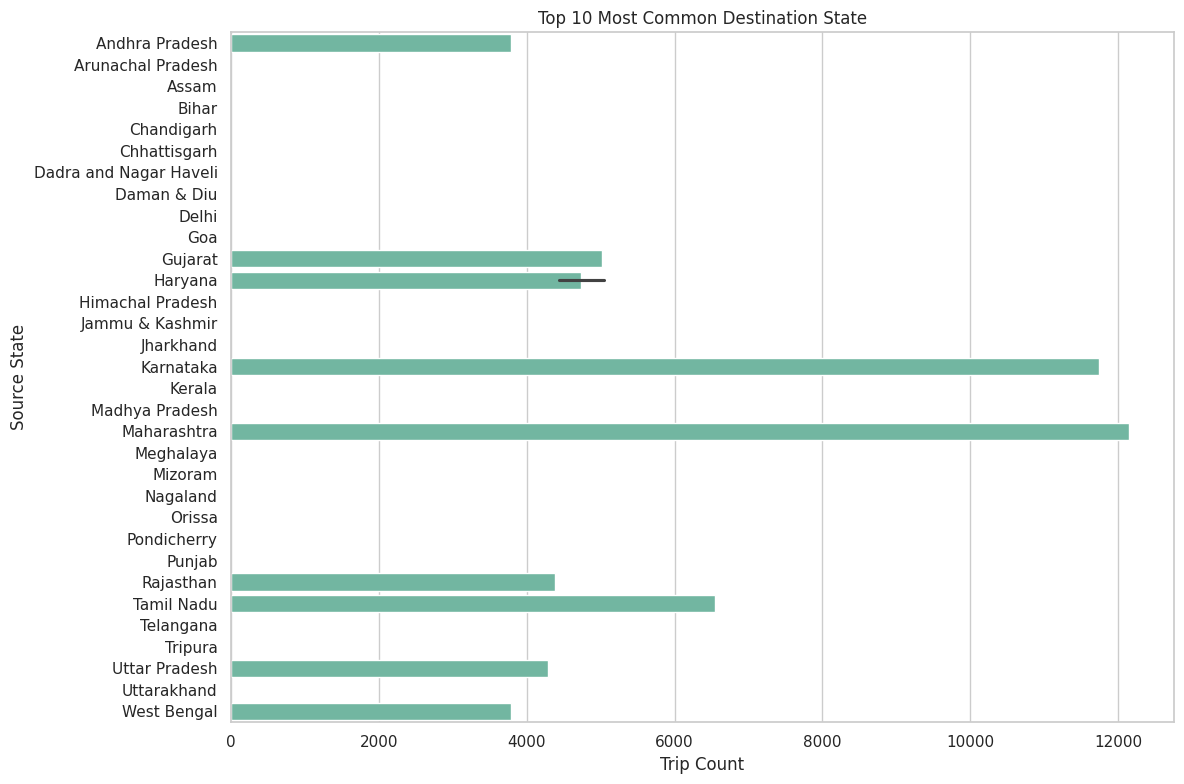

In [ ]:
route_counts = merged_df.groupby(['src_state', 'dest_state']).size().reset_index(name='trip_count')
top_routes = route_counts.sort_values('trip_count', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_routes, x='trip_count', y='dest_state')
plt.title('Top 10 Most Common Destination State')
plt.xlabel('Trip Count')
plt.ylabel('Source State')
#plt.legend(title='Destination State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations**:

* Maharashtra and Karnataka again dominate as the top destination states.

* Tamil Nadu, Gujarat, and Haryana follow closely followed by Andhra Pradesh, Rajasthan, Uttar Pradesh and West Bengal.

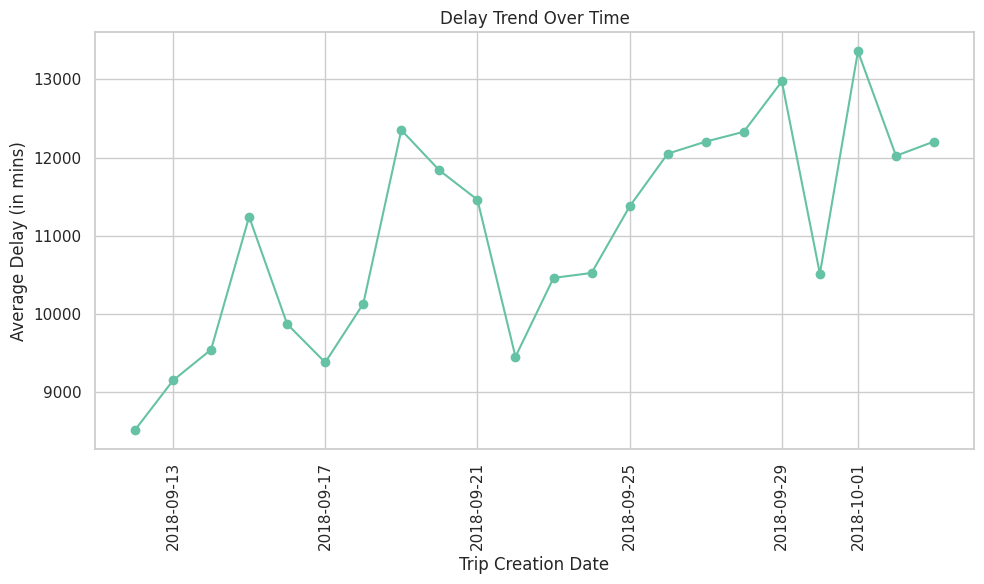

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert trip_creation_time to datetime (if not already)
#df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

# Optionally group by date (daily/weekly/monthly) to smooth the trend
merged_df['trip_date'] = merged_df['trip_creation_time'].dt.date  # Use only date part
# df['trip_week'] = df['trip_creation_time'].dt.to_period('W')  # For weekly trend

# Aggregate average delay per day
delay_trend = merged_df.groupby('trip_date')['delay (in mins)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(delay_trend['trip_date'], delay_trend['delay (in mins)'], marker='o', linestyle='-')
plt.title('Delay Trend Over Time')
plt.xlabel('Trip Creation Date')
plt.ylabel('Average Delay (in mins)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations:**
* The delay ranges from around 8,000 to over 13,000 minutes. There is significant fluctuation in delays from day to day.

* A sharp drop in delay occurred around September 30, followed by a spike again on October 1.

* Delays were consistently rising between September 17 to 29, suggesting possible issues building up over this time (e.g., traffic, volume, operational bottlenecks).